In [135]:
#libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Library for feature Scaling
from sklearn.preprocessing import RobustScaler

#Libraries for logistic Regression Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [136]:
train=pd.read_csv("/content/titanic_dataset.csv")

In [137]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [141]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [142]:
#rows and columns
train.shape

(1309, 12)

In [143]:
#total no. of people survived or not
train['Survived'].value_counts()

,count
Survived,
0,815
1,494


In [144]:
pd.crosstab(train['Sex'],train['Survived'])

Survived,0,1
Sex,,
female,81,385
male,734,109


In [145]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


<Axes: >

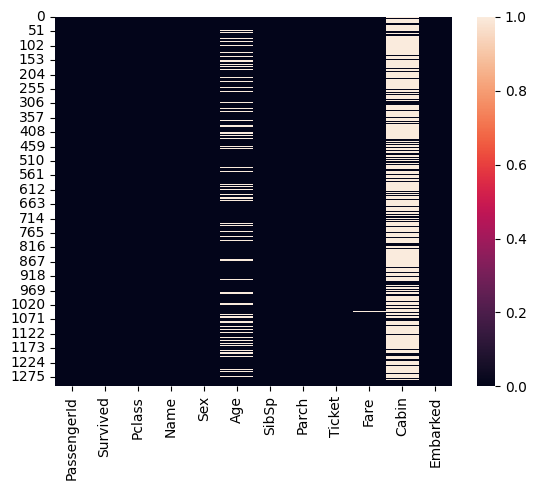

In [146]:
sns.heatmap(train.isnull())

In [147]:
train.drop(['Cabin'],axis=1,inplace=True)

In [148]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [149]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [150]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [151]:
train['Embarked']=train['Embarked'].fillna('S')

In [152]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [153]:
mean_age=train['Age'].mean()
#train['Age'].median()
#train['Age'].mode()

In [154]:
mean_age

np.float64(29.881137667304014)

In [155]:
std_age=train['Age'].std()

In [156]:
std_age

14.413493211271334

In [157]:
low_age=mean_age-std_age

In [158]:
low_age

np.float64(15.46764445603268)

In [159]:
high_age=mean_age+std_age

In [160]:
high_age

np.float64(44.29463087857535)

In [161]:
random_ages=np.random.randint(15,44,263)

In [162]:
random_ages

array([26, 18, 22, 40, 23, 20, 40, 18, 18, 21, 33, 30, 25, 39, 42, 27, 19,
       29, 16, 34, 42, 41, 23, 37, 34, 20, 38, 28, 18, 42, 43, 32, 35, 30,
       31, 23, 27, 15, 32, 43, 27, 27, 37, 19, 23, 27, 31, 24, 23, 29, 23,
       15, 42, 26, 35, 19, 19, 30, 15, 34, 39, 26, 26, 26, 42, 26, 38, 39,
       24, 33, 32, 17, 38, 22, 42, 16, 38, 33, 25, 17, 29, 24, 22, 35, 19,
       39, 31, 20, 36, 39, 34, 38, 41, 21, 25, 41, 34, 17, 27, 25, 19, 28,
       29, 20, 32, 20, 26, 42, 25, 17, 19, 42, 38, 37, 22, 29, 27, 20, 20,
       39, 15, 42, 17, 30, 30, 27, 24, 42, 37, 35, 41, 25, 31, 19, 35, 31,
       17, 32, 24, 40, 39, 40, 31, 24, 22, 38, 26, 39, 25, 42, 29, 22, 31,
       16, 39, 30, 20, 22, 24, 25, 38, 18, 34, 34, 26, 29, 38, 41, 23, 41,
       25, 38, 30, 23, 23, 40, 30, 24, 33, 39, 31, 17, 25, 40, 35, 29, 28,
       34, 27, 39, 32, 39, 34, 39, 38, 29, 19, 28, 43, 16, 29, 35, 38, 37,
       27, 25, 41, 43, 23, 25, 27, 27, 15, 19, 43, 30, 29, 33, 40, 18, 42,
       18, 31, 22, 40, 29

In [163]:
age_copy=train['Age'].copy()

In [164]:
age_copy

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
1304,NaN
1305,39.0
1306,38.5
1307,NaN


In [165]:
age_copy[np.isnan(age_copy)]=random_ages

In [166]:
age_copy

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
1304,19.0
1305,39.0
1306,38.5
1307,37.0


In [167]:
train['Age']=age_copy

In [168]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [169]:
train.dropna(inplace=True)

In [170]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [171]:
train['Sex'].value_counts()

,count
Sex,
male,842
female,466


In [172]:
train["Embarked"].value_counts()

,count
Embarked,
S,915
C,270
Q,123


<Axes: xlabel='Survived', ylabel='count'>

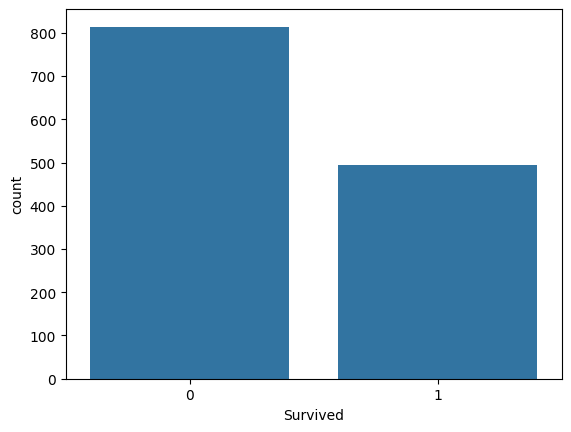

In [173]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Sex', ylabel='count'>

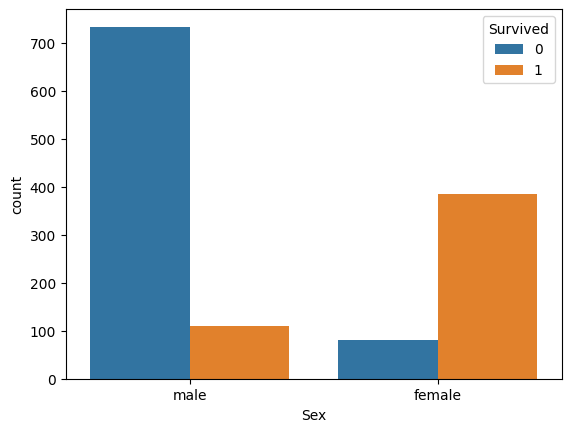

In [174]:
sns.countplot(x="Sex",hue="Survived",data=train)

<Axes: xlabel='Pclass', ylabel='count'>

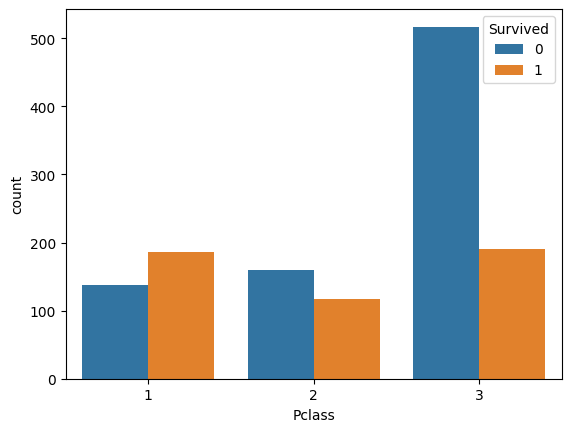

In [175]:
sns.countplot(x="Pclass",hue="Survived",data=train)

<Axes: xlabel='Embarked', ylabel='count'>

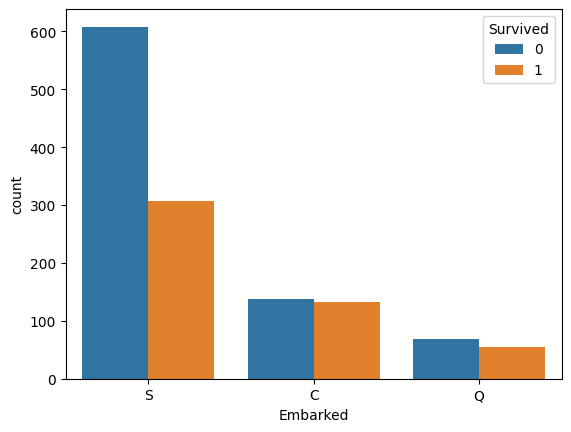

In [176]:
sns.countplot(x="Embarked",hue="Survived",data=train)

In [177]:
train['Sex']=train['Sex'].map({'male':1,'female':0})

In [178]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",1,19.0,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",1,37.0,0,0,359309,8.0500,S


In [179]:
boarding_point = pd.get_dummies(train["Embarked"], drop_first=True).astype(int)
boarding_point.head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [180]:
train.drop(["Name","Ticket","PassengerId","Embarked"],axis=1,inplace=True)

In [181]:
train=pd.concat([train,boarding_point],axis=1)

In [182]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,1,19.0,0,0,8.0500,0,1
1305,1,1,0,39.0,0,0,108.9000,0,0
1306,0,3,1,38.5,0,0,7.2500,0,1
1307,0,3,1,37.0,0,0,8.0500,0,1


In [183]:
X=train.drop("Survived",axis=1)
Y=train["Survived"]

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [192]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(915, 8) (393, 8) (915,) (393,)


In [193]:
X.shape

(1308, 8)

In [194]:
Y.shape

(1308,)

In [199]:
model=LogisticRegression()

In [200]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [201]:
x_train_prediction = model.predict(x_train)
x_train_prediction

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [207]:
accuracy_train = accuracy_score(y_train,x_train_prediction)
accuracy_train

0.8633879781420765

In [206]:
x_test_prediction = model.predict(x_test)
x_test_prediction

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [208]:
accuracy_test = accuracy_score(y_test,x_test_prediction)
accuracy_test

0.8396946564885496

In [214]:
y_test.value_counts()

,count
Survived,
0,240
1,153


In [215]:
y_train.value_counts()


,count
Survived,
0,574
1,341


In [209]:
import pickle

In [210]:
with open("model.pkl","wb") as f:
    pickle.dump(model,f)

In [211]:
with open("model.pkl","rb") as f:
    loaded_model = pickle.load(f)

In [213]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
1304,3,1,19.0,0,0,8.0500,0,1
1305,1,0,39.0,0,0,108.9000,0,0
1306,3,1,38.5,0,0,7.2500,0,1
1307,3,1,37.0,0,0,8.0500,0,1


In [216]:
rose=[[1,1,22,1,1,512.3292,0,1]]
model.predict(rose)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])